In [5]:
from tensorflow.keras import datasets, models, layers

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
(train_img,train_label),(test_img,test_label) = datasets.cifar10.load_data()

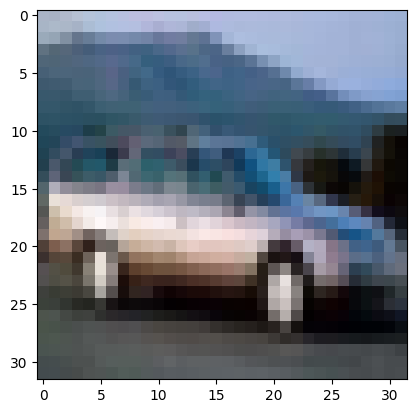

In [11]:
plt.imshow(train_img[4])

In [10]:
print(train_label[4])

[1]


In [13]:
classes = ["airplane","car","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
train_img = train_img/255
test_img = test_img/255

In [19]:
model = models.Sequential()

In [20]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(train_img,train_label,epochs=10,validation_data=(test_img,test_label))

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6149 - accuracy: 0.4180 - val_loss: 1.3381 - val_accuracy: 0.5177
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2430 - accuracy: 0.5584 - val_loss: 1.2332 - val_accuracy: 0.5589
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0790 - accuracy: 0.6206 - val_loss: 1.0481 - val_accuracy: 0.6240
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9793 - accuracy: 0.6551 - val_loss: 0.9738 - val_accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9063 - accuracy: 0.6840 - val_loss: 0.9444 - val_accuracy: 0.6693
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8524 - accuracy: 0.7012 - val_loss: 1.0496 - val_accuracy: 0.6395
Epoch 7/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8046 - accuracy: 0.7194 - val_loss: 0.8773 -

In [23]:
loss, accuracy = model.evaluate(test_img,test_label)
print(f"Loss : {loss}")
print(f"accuracy : {accuracy}")

313/313 [==============================] - 4s 13ms/step - loss: 0.8487 - accuracy: 0.7077
Loss : 0.84869384765625
accuracy : 0.7077000141143799


In [25]:
model.save("CIFAR10_Image_Classifire.model")

INFO:tensorflow:Assets written to: CIFAR10_Image_Classifire.model\assets


INFO:tensorflow:Assets written to: CIFAR10_Image_Classifire.model\assets


In [26]:
model = models.load_model("CIFAR10_Image_Classifire.model/")

In [37]:
img = cv.imread('car.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

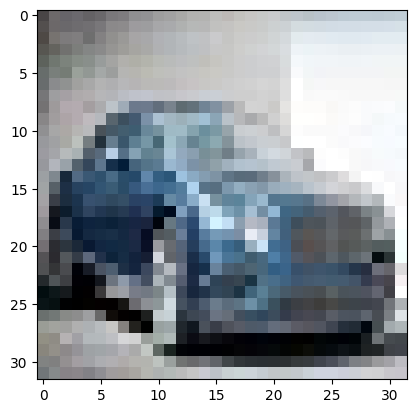

In [38]:
plt.imshow(img, cmap=plt.cm.binary)

In [39]:
prediction = model.predict(np.array([img])/255)

1/1 [==============================] - 0s 31ms/step


In [40]:
index = np.argmax(prediction)

In [41]:
print(f"Image class : {classes[index]}")

Image class : car
